In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
data_path = '/content/drive/MyDrive/'

# Importing Necessary Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score,KFold,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import confusion_matrix, accuracy_score,recall_score,precision_score,fbeta_score,classification_report,f1_score, make_scorer


In [4]:
raw_data = pd.read_csv(data_path + 'Fraud.csv')
raw_data

step      type      amount     nameOrig  oldbalanceOrg  \
0           1   PAYMENT     9839.64  C1231006815      170136.00   
1           1   PAYMENT     1864.28  C1666544295       21249.00   
2           1  TRANSFER      181.00  C1305486145         181.00   
3           1  CASH_OUT      181.00   C840083671         181.00   
4           1   PAYMENT    11668.14  C2048537720       41554.00   
...       ...       ...         ...          ...            ...   
6362615   743  CASH_OUT   339682.13   C786484425      339682.13   
6362616   743  TRANSFER  6311409.28  C1529008245     6311409.28   
6362617   743  CASH_OUT  6311409.28  C1162922333     6311409.28   
6362618   743  TRANSFER   850002.52  C1685995037      850002.52   
6362619   743  CASH_OUT   850002.52  C1280323807      850002.52   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
0             160296.36  M1979787155            0.00            0.00        0   
1              19384.72  M2044282225            0.00            0.00        0   
2                  0.00   C553264065            0.00            0.00        1   
3                  0.00    C38997010        21182.00            0.00        1   
4              29885.86  M1230701703            0.00            0.00        0   
...                 ...          ...             ...             ...      ...   
6362615            0.00   C776919290            0.00       339682.13        1   
6362616            0.00  C1881841831            0.00            0.00        1   
6362617            0.00  C1365125890        68488.84      6379898.11        1   
6362618            0.00  C2080388513            0.00            0.00        1   
6362619            0.00   C873221189      6510099.11      7360101.63        1   

         isFlaggedFraud  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  
...                 ...  
6362615               0  
6362616               0  
6362617               0  
6362618               0  
6362619               0  

[6362620 rows x 11 columns]

In [5]:
column_name = raw_data.columns
column_name

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
raw_data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [8]:
ordinal_coder = OrdinalEncoder()
onehot_encod = OneHotEncoder()
lbl_cod = LabelEncoder()

In [9]:
data_lab = lbl_cod.fit_transform(raw_data['nameOrig'])
array = np.array(data_lab)

# Converting Non Numeric data into Numeric data

In [10]:
nameOrig = pd.DataFrame(array)
nameorig = nameOrig.rename(columns={0:'nameOrig_encoded'})
nameorig

nameOrig_encoded
0                  757869
1                 2188998
2                 1002156
3                 5828262
4                 3445981
...                   ...
6362615           5651847
6362616           1737278
6362617            533958
6362618           2252932
6362619            919229

[6362620 rows x 1 columns]

In [11]:
data_lab_1 = lbl_cod.fit_transform(raw_data['nameDest'])
array_1 = np.array(data_lab_1)

In [12]:
nameDest = pd.DataFrame(array_1)
namedest = nameDest.rename(columns={0:'nameDest_encoded'})
namedest

nameDest_encoded
0                 1662094
1                 1733924
2                  439685
3                  391696
4                  828919
...                   ...
6362615            505863
6362616            260949
6362617            108224
6362618            319713
6362619            534595

[6362620 rows x 1 columns]

In [13]:
payment_type = lbl_cod.fit_transform(raw_data['type'])
payment = np.array(payment_type)

In [14]:
payment_method = pd.DataFrame(payment)
pay = payment_method.rename(columns= {0:'type_encoded'})
pay

type_encoded
0                   3
1                   3
2                   4
3                   1
4                   3
...               ...
6362615             1
6362616             4
6362617             1
6362618             4
6362619             1

[6362620 rows x 1 columns]

In [15]:
raw_data['type_encoded'] = pay['type_encoded']
raw_data['nameDest_encoded'] = namedest['nameDest_encoded']
raw_data['nameOrig_encoded'] = nameorig['nameOrig_encoded']
raw_data

step      type      amount     nameOrig  oldbalanceOrg  \
0           1   PAYMENT     9839.64  C1231006815      170136.00   
1           1   PAYMENT     1864.28  C1666544295       21249.00   
2           1  TRANSFER      181.00  C1305486145         181.00   
3           1  CASH_OUT      181.00   C840083671         181.00   
4           1   PAYMENT    11668.14  C2048537720       41554.00   
...       ...       ...         ...          ...            ...   
6362615   743  CASH_OUT   339682.13   C786484425      339682.13   
6362616   743  TRANSFER  6311409.28  C1529008245     6311409.28   
6362617   743  CASH_OUT  6311409.28  C1162922333     6311409.28   
6362618   743  TRANSFER   850002.52  C1685995037      850002.52   
6362619   743  CASH_OUT   850002.52  C1280323807      850002.52   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
0             160296.36  M1979787155            0.00            0.00        0   
1              19384.72  M2044282225            0.00            0.00        0   
2                  0.00   C553264065            0.00            0.00        1   
3                  0.00    C38997010        21182.00            0.00        1   
4              29885.86  M1230701703            0.00            0.00        0   
...                 ...          ...             ...             ...      ...   
6362615            0.00   C776919290            0.00       339682.13        1   
6362616            0.00  C1881841831            0.00            0.00        1   
6362617            0.00  C1365125890        68488.84      6379898.11        1   
6362618            0.00  C2080388513            0.00            0.00        1   
6362619            0.00   C873221189      6510099.11      7360101.63        1   

         isFlaggedFraud  type_encoded  nameDest_encoded  nameOrig_encoded  
0                     0             3           1662094            757869  
1                     0             3           1733924           2188998  
2                     0             4            439685           1002156  
3                     0             1            391696           5828262  
4                     0             3            828919           3445981  
...                 ...           ...               ...               ...  
6362615               0             1            505863           5651847  
6362616               0             4            260949           1737278  
6362617               0             1            108224            533958  
6362618               0             4            319713           2252932  
6362619               0             1            534595            919229  

[6362620 rows x 14 columns]

In [16]:
cleaned_data = raw_data[['step','type_encoded','amount','nameOrig_encoded','oldbalanceOrg','newbalanceOrig','nameDest_encoded','oldbalanceDest','newbalanceDest','isFraud','isFlaggedFraud']]
cleaned_data

step  type_encoded      amount  nameOrig_encoded  oldbalanceOrg  \
0           1             3     9839.64            757869      170136.00   
1           1             3     1864.28           2188998       21249.00   
2           1             4      181.00           1002156         181.00   
3           1             1      181.00           5828262         181.00   
4           1             3    11668.14           3445981       41554.00   
...       ...           ...         ...               ...            ...   
6362615   743             1   339682.13           5651847      339682.13   
6362616   743             4  6311409.28           1737278     6311409.28   
6362617   743             1  6311409.28            533958     6311409.28   
6362618   743             4   850002.52           2252932      850002.52   
6362619   743             1   850002.52            919229      850002.52   

         newbalanceOrig  nameDest_encoded  oldbalanceDest  newbalanceDest  \
0             160296.36           1662094            0.00            0.00   
1              19384.72           1733924            0.00            0.00   
2                  0.00            439685            0.00            0.00   
3                  0.00            391696        21182.00            0.00   
4              29885.86            828919            0.00            0.00   
...                 ...               ...             ...             ...   
6362615            0.00            505863            0.00       339682.13   
6362616            0.00            260949            0.00            0.00   
6362617            0.00            108224        68488.84      6379898.11   
6362618            0.00            319713            0.00            0.00   
6362619            0.00            534595      6510099.11      7360101.63   

         isFraud  isFlaggedFraud  
0              0               0  
1              0               0  
2              1               0  
3              1               0  
4              0               0  
...          ...             ...  
6362615        1               0  
6362616        1               0  
6362617        1               0  
6362618        1               0  
6362619        1               0  

[6362620 rows x 11 columns]

In [17]:
plt.figure(figsize=(50, 508))
cleaned_data.boxplot()
plt.title('Boxplot of Features')
plt.show()

In [18]:
corr = cleaned_data.corr()
corr

step  type_encoded    amount  nameOrig_encoded  \
step              1.000000      0.006635  0.022373         -0.000146   
type_encoded      0.006635      1.000000  0.088419          0.000213   
amount            0.022373      0.088419  1.000000          0.000124   
nameOrig_encoded -0.000146      0.000213  0.000124          1.000000   
oldbalanceOrg    -0.010058     -0.339760 -0.002762         -0.000648   
newbalanceOrig   -0.010299     -0.352758 -0.007861         -0.000675   
nameDest_encoded  0.003767      0.584275 -0.169150         -0.000256   
oldbalanceDest    0.027665     -0.104679  0.294137          0.000245   
newbalanceDest    0.025888     -0.059364  0.459304          0.000255   
isFraud           0.031578      0.020833  0.076688         -0.000464   
isFlaggedFraud    0.003277      0.002685  0.012295          0.000667   

                  oldbalanceOrg  newbalanceOrig  nameDest_encoded  \
step                  -0.010058       -0.010299          0.003767   
type_encoded          -0.339760       -0.352758          0.584275   
amount                -0.002762       -0.007861         -0.169150   
nameOrig_encoded      -0.000648       -0.000675         -0.000256   
oldbalanceOrg          1.000000        0.998803         -0.162688   
newbalanceOrig         0.998803        1.000000         -0.166489   
nameDest_encoded      -0.162688       -0.166489          1.000000   
oldbalanceDest         0.066243        0.067812         -0.198119   
newbalanceDest         0.042029        0.041837         -0.203992   
isFraud                0.010154       -0.008148         -0.021963   
isFlaggedFraud         0.003835        0.003776         -0.001122   

                  oldbalanceDest  newbalanceDest   isFraud  isFlaggedFraud  
step                    0.027665        0.025888  0.031578        0.003277  
type_encoded           -0.104679       -0.059364  0.020833        0.002685  
amount                  0.294137        0.459304  0.076688        0.012295  
nameOrig_encoded        0.000245        0.000255 -0.000464        0.000667  
oldbalanceOrg           0.066243        0.042029  0.010154        0.003835  
newbalanceOrig          0.067812        0.041837 -0.008148        0.003776  
nameDest_encoded       -0.198119       -0.203992 -0.021963       -0.001122  
oldbalanceDest          1.000000        0.976569 -0.005885       -0.000513  
newbalanceDest          0.976569        1.000000  0.000535       -0.000529  
isFraud                -0.005885        0.000535  1.000000        0.044109  
isFlaggedFraud         -0.000513       -0.000529  0.044109        1.000000

# Finding a Ralation Between the Features

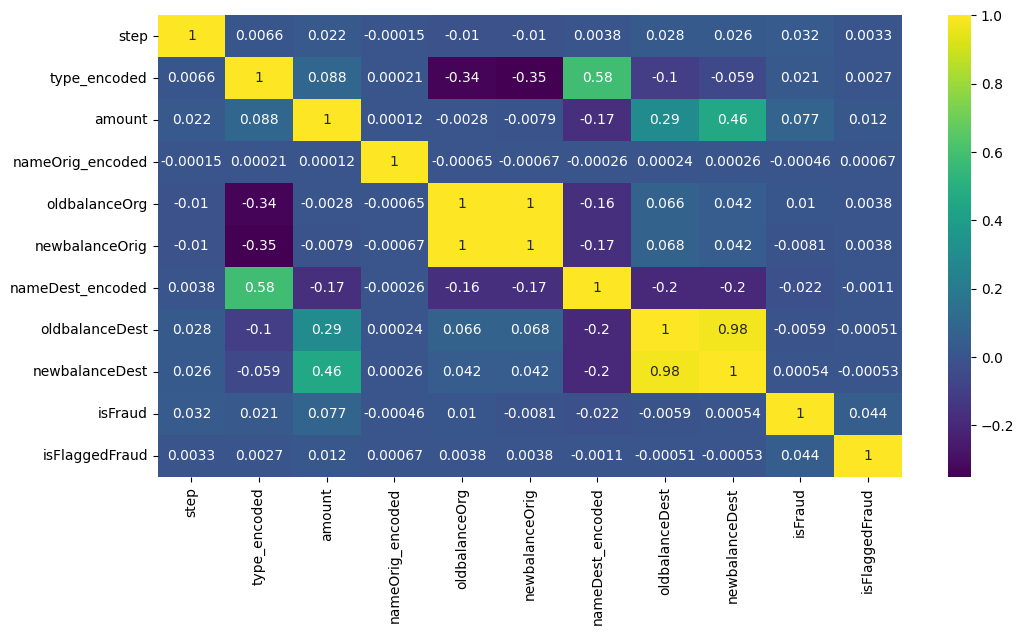

In [19]:
plt.figure(figsize=(12,6))
sns.heatmap(corr,annot=True,cmap='viridis')
plt.show()

# Relationship Between the independent Feature and Target Feature

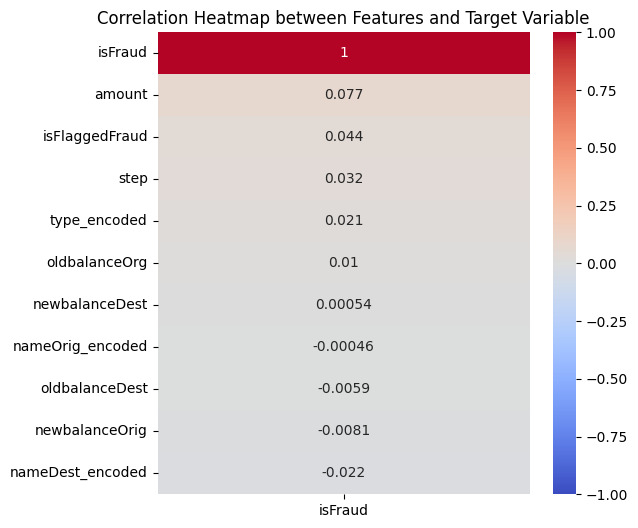

In [20]:
plt.figure(figsize=(6, 6))
sns.heatmap(corr[['isFraud']].sort_values(by='isFraud', ascending=False),
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap between Features and Target Variable')
plt.show()

In [21]:
cleaned_data.describe()

step  type_encoded        amount  nameOrig_encoded  \
count  6.362620e+06  6.362620e+06  6.362620e+06      6.362620e+06   
mean   2.433972e+02  1.714150e+00  1.798619e+05      3.176678e+06   
std    1.423320e+02  1.350117e+00  6.038582e+05      1.834064e+06   
min    1.000000e+00  0.000000e+00  0.000000e+00      0.000000e+00   
25%    1.560000e+02  1.000000e+00  1.338957e+04      1.588332e+06   
50%    2.390000e+02  1.000000e+00  7.487194e+04      3.176672e+06   
75%    3.350000e+02  3.000000e+00  2.087215e+05      4.765048e+06   
max    7.430000e+02  4.000000e+00  9.244552e+07      6.353306e+06   

       oldbalanceOrg  newbalanceOrig  nameDest_encoded  oldbalanceDest  \
count   6.362620e+06    6.362620e+06      6.362620e+06    6.362620e+06   
mean    8.338831e+05    8.551137e+05      7.464270e+05    1.100702e+06   
std     2.888243e+06    2.924049e+06      7.502455e+05    3.399180e+06   
min     0.000000e+00    0.000000e+00      0.000000e+00    0.000000e+00   
25%     0.000000e+00    0.000000e+00      2.168950e+05    0.000000e+00   
50%     1.420800e+04    0.000000e+00      4.322890e+05    1.327057e+05   
75%     1.073152e+05    1.442584e+05      1.132509e+06    9.430367e+05   
max     5.958504e+07    4.958504e+07      2.722361e+06    3.560159e+08   

       newbalanceDest       isFraud  isFlaggedFraud  
count    6.362620e+06  6.362620e+06    6.362620e+06  
mean     1.224996e+06  1.290820e-03    2.514687e-06  
std      3.674129e+06  3.590480e-02    1.585775e-03  
min      0.000000e+00  0.000000e+00    0.000000e+00  
25%      0.000000e+00  0.000000e+00    0.000000e+00  
50%      2.146614e+05  0.000000e+00    0.000000e+00  
75%      1.111909e+06  0.000000e+00    0.000000e+00  
max      3.561793e+08  1.000000e+00    1.000000e+00

In [22]:
type_graph = cleaned_data['type_encoded'].value_counts().sort_index()
type_graph

0    1399284
1    2237500
2      41432
3    2151495
4     532909
Name: type_encoded, dtype: int64

## Type encoded gives an information about what kind of transaction happened

*   0 -> CASH-IN
*   1 -> CASH-OUT
*   2 -> DEBIT
*   3 -> PAYMENT
*   4 -> TRANSFER


In [23]:
frad_graph = cleaned_data['isFraud'].value_counts().sort_index()
frad_graph

0    6354407
1       8213
Name: isFraud, dtype: int64

# Tells about Fraud happend or not

*   0 -> Not a Fraud
*   1 -> Fraud

there are 8213 fraud case happend

In [24]:
frad_happened = cleaned_data.loc[cleaned_data['isFraud'].astype(int)==1]
frad_happened

step  type_encoded      amount  nameOrig_encoded  oldbalanceOrg  \
2           1             4      181.00           1002156         181.00   
3           1             1      181.00           5828262         181.00   
251         1             4     2806.00           1379875        2806.00   
252         1             1     2806.00           3619815        2806.00   
680         1             4    20128.00           1232211       20128.00   
...       ...           ...         ...               ...            ...   
6362615   743             1   339682.13           5651847      339682.13   
6362616   743             4  6311409.28           1737278     6311409.28   
6362617   743             1  6311409.28            533958     6311409.28   
6362618   743             4   850002.52           2252932      850002.52   
6362619   743             1   850002.52            919229      850002.52   

         newbalanceOrig  nameDest_encoded  oldbalanceDest  newbalanceDest  \
2                   0.0            439685            0.00            0.00   
3                   0.0            391696        21182.00            0.00   
251                 0.0            563886            0.00            0.00   
252                 0.0              2134        26202.00            0.00   
680                 0.0            251089            0.00            0.00   
...                 ...               ...             ...             ...   
6362615             0.0            505863            0.00       339682.13   
6362616             0.0            260949            0.00            0.00   
6362617             0.0            108224        68488.84      6379898.11   
6362618             0.0            319713            0.00            0.00   
6362619             0.0            534595      6510099.11      7360101.63   

         isFraud  isFlaggedFraud  
2              1               0  
3              1               0  
251            1               0  
252            1               0  
680            1               0  
...          ...             ...  
6362615        1               0  
6362616        1               0  
6362617        1               0  
6362618        1               0  
6362619        1               0  

[8213 rows x 11 columns]

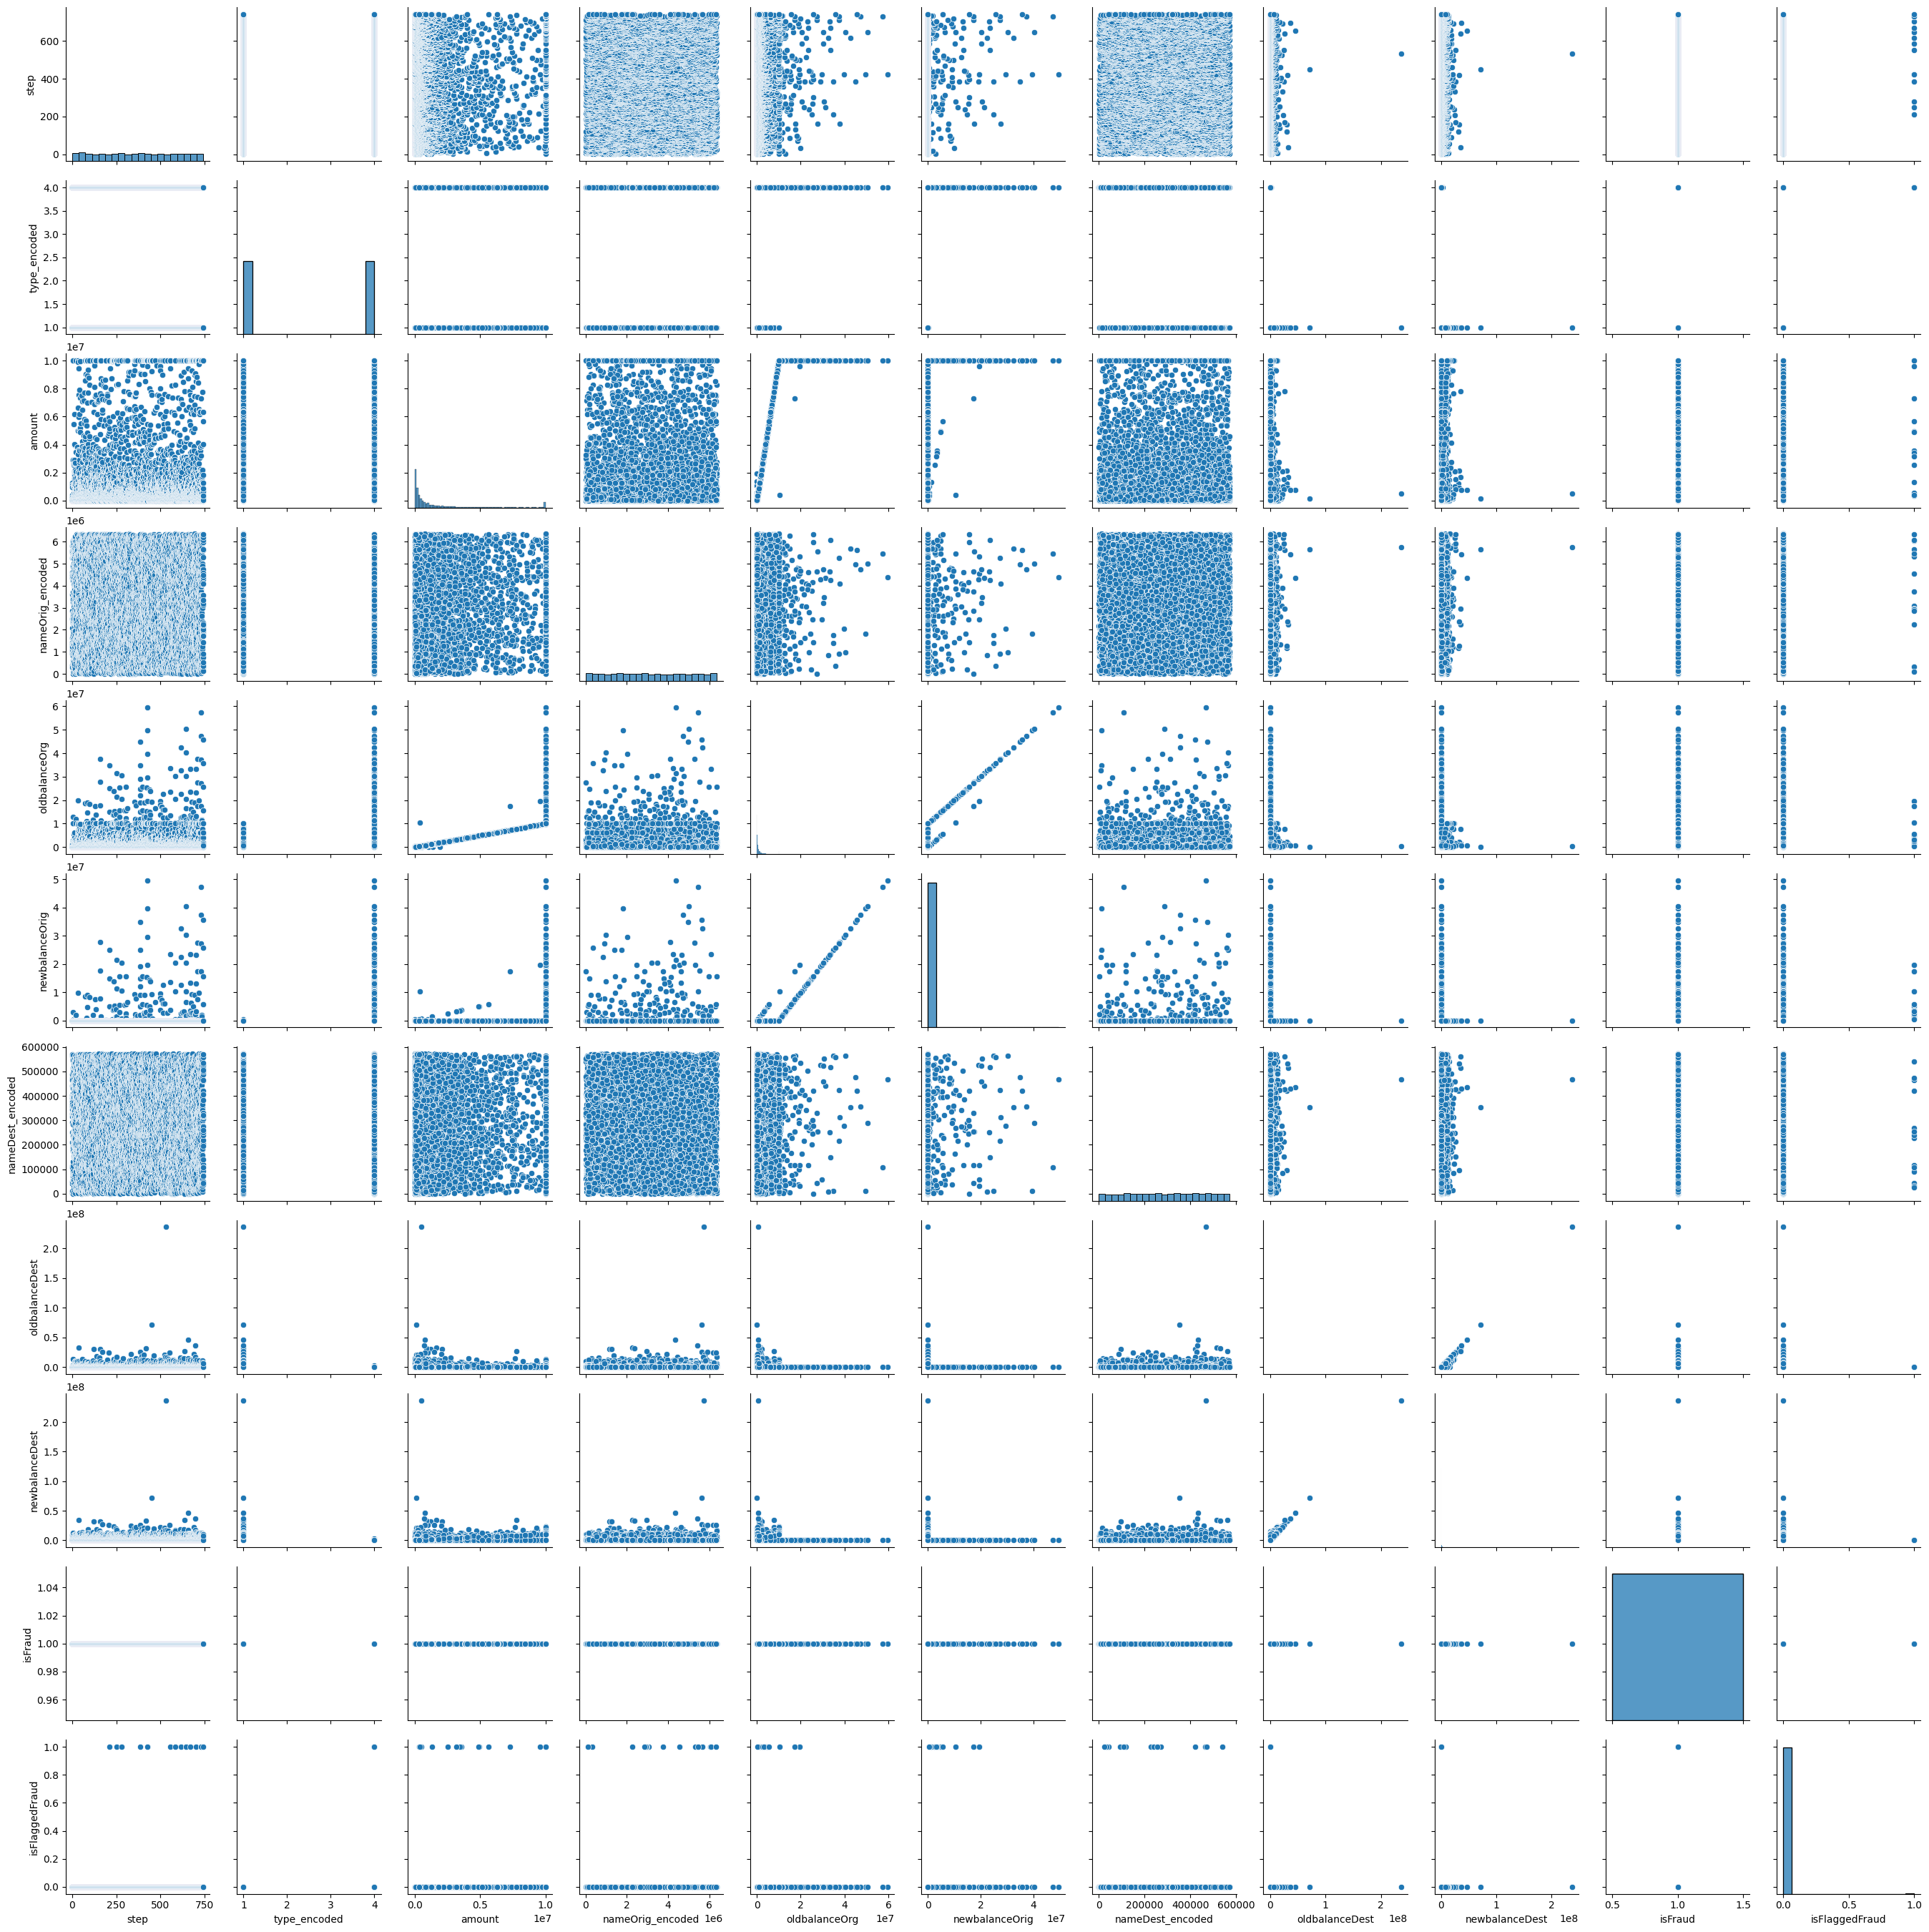

In [25]:
sns.pairplot(frad_happened)
plt.show()

In [26]:
fraud_happen_type = frad_happened['type_encoded'].value_counts()
fraud_happen_type

1    4116
4    4097
Name: type_encoded, dtype: int64

# Type of Transaction during fraud activity


*   4116 times fraud happens through CASH-OUT type of transaction
*   4097 times fraud happens through TRANSFER type of transaction


so fraud happens only these 2 type of transaction


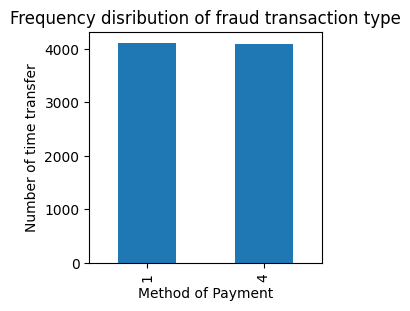

In [27]:
plt.figure(figsize=(3,3))
fraud_happen_type.plot(kind='bar')
plt.xlabel('Method of Payment')
plt.ylabel('Number of time transfer')
plt.title('Frequency disribution of fraud transaction type')
plt.show()

In [28]:
fraud_happen_step = frad_happened['step'].value_counts().sort_values(ascending=False)
fraud_happen_step

212    40
523    30
387    28
425    28
249    28
       ..
23      2
252     2
471     2
168     2
662     2
Name: step, Length: 741, dtype: int64

# At what time fraud happens most of the times
usually most number of fraud happens every 200h, between the 200h few number of fraud happens.

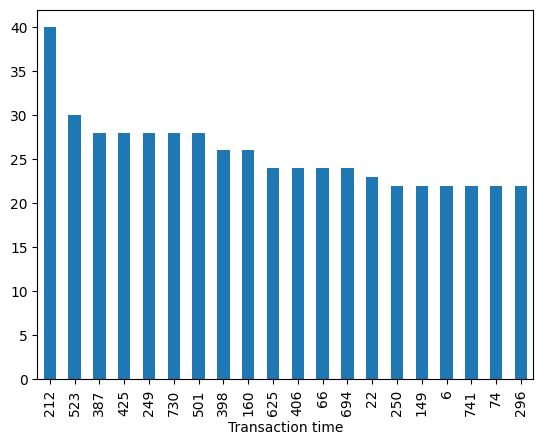

In [29]:
fraud_happen_step.head(20).plot(kind='bar')
plt.xlabel('Transaction time')
plt.show()

In [30]:
frad_amount = frad_happened['amount'].value_counts().sort_values(ascending=False)
frad_amount

10000000.00    287
0.00            16
1165187.89       4
429257.45        4
2662734.59       2
              ... 
42062.82         1
508782.20        1
123194.95        1
122101.57        1
234377.29        1
Name: amount, Length: 3977, dtype: int64

# Frauded Amount


*   287 time the amount 10000000.00 got frauded



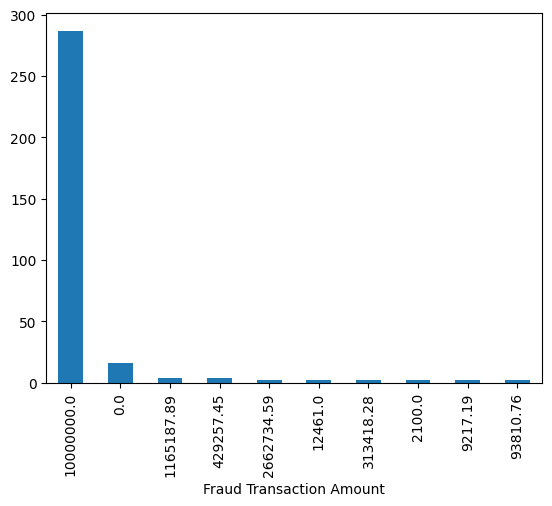

In [31]:
frad_amount.head(10).plot(kind= 'bar')
plt.xlabel('Fraud Transaction Amount')
plt.show()

In [32]:
frad_old_bal = frad_happened['oldbalanceOrg'].value_counts().sort_values(ascending=False)
frad_old_bal

10000000.00    142
0.00            41
1165187.89       4
429257.45        4
6188772.44       2
              ... 
353874.22        1
10353874.22      1
20353874.22      1
30353874.22      1
12740879.15      1
Name: oldbalanceOrg, Length: 4094, dtype: int64

In [33]:
frad_old_bal = frad_happened['newbalanceOrig'].value_counts().sort_values(ascending=False)
frad_old_bal

0.00           8053
10399045.08       3
19585040.37       3
17316255.05       3
3576297.10        2
               ... 
25674547.89       1
15674547.89       1
2113271.99        1
9228514.10        1
29585040.37       1
Name: newbalanceOrig, Length: 145, dtype: int64

In [34]:
frad_old_bal = frad_happened['nameDest_encoded'].value_counts().sort_values(ascending=False)
frad_old_bal

57504     2
118434    2
290228    2
136628    2
561398    2
         ..
526597    1
220058    1
512104    1
240455    1
534595    1
Name: nameDest_encoded, Length: 8169, dtype: int64

In [35]:
flag_frad_graph = frad_happened['isFlaggedFraud'].value_counts().sort_index()
flag_frad_graph

0    8197
1      16
Name: isFlaggedFraud, dtype: int64

In [36]:
flag_frad_graph = cleaned_data['isFlaggedFraud'].value_counts().sort_index()
flag_frad_graph

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

If give a isFlaggedFraud title means definetly it's frauded

# Model

In [37]:
x = cleaned_data.drop('isFraud',axis=1)
x

step  type_encoded      amount  nameOrig_encoded  oldbalanceOrg  \
0           1             3     9839.64            757869      170136.00   
1           1             3     1864.28           2188998       21249.00   
2           1             4      181.00           1002156         181.00   
3           1             1      181.00           5828262         181.00   
4           1             3    11668.14           3445981       41554.00   
...       ...           ...         ...               ...            ...   
6362615   743             1   339682.13           5651847      339682.13   
6362616   743             4  6311409.28           1737278     6311409.28   
6362617   743             1  6311409.28            533958     6311409.28   
6362618   743             4   850002.52           2252932      850002.52   
6362619   743             1   850002.52            919229      850002.52   

         newbalanceOrig  nameDest_encoded  oldbalanceDest  newbalanceDest  \
0             160296.36           1662094            0.00            0.00   
1              19384.72           1733924            0.00            0.00   
2                  0.00            439685            0.00            0.00   
3                  0.00            391696        21182.00            0.00   
4              29885.86            828919            0.00            0.00   
...                 ...               ...             ...             ...   
6362615            0.00            505863            0.00       339682.13   
6362616            0.00            260949            0.00            0.00   
6362617            0.00            108224        68488.84      6379898.11   
6362618            0.00            319713            0.00            0.00   
6362619            0.00            534595      6510099.11      7360101.63   

         isFlaggedFraud  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  
...                 ...  
6362615               0  
6362616               0  
6362617               0  
6362618               0  
6362619               0  

[6362620 rows x 10 columns]

In [38]:
y = cleaned_data[['isFraud']]
y

isFraud
0              0
1              0
2              1
3              1
4              0
...          ...
6362615        1
6362616        1
6362617        1
6362618        1
6362619        1

[6362620 rows x 1 columns]

In [39]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=.2,random_state=20)

# Spliting the data

In [40]:
logistic_model = LogisticRegression()

# LogisticRegression model
Logistic Regression is a statistical model that predicts the probability of a binary outcome.Done the model evaluation using Fbeta score, precission and Recall score

In [41]:
y_trn = Y_train.to_numpy().ravel()

In [42]:
logistic_model.fit(X_train,y_trn)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [43]:
Y_pred = logistic_model.predict(X_test)
Y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [44]:
accuracy = accuracy_score(Y_test,Y_pred)
accuracy

0.9991143585504085

Data was imbalenced so got accuracy 99%

In [45]:
confi_mat = confusion_matrix(Y_test,Y_pred)
confi_mat

array([[1270697,     186],
       [    941,     700]])

# Confussion Matix
TP 1270697

*   TP 1270697
*   TN 700
*   FP 186
*  FN 941

In [46]:
presin_scr = precision_score(Y_test,Y_pred)
presin_scr

0.7900677200902935

79% of the data predicted correctly in total +ve prediction

In [47]:
recall_score(Y_test,Y_pred)

0.42656916514320536

42% of the data predicted correctly out of total number of +ve actual values

In [48]:
fbeta_score(Y_test,Y_pred,beta=.5)

0.6750241080038574

overall 67.5% from the LogisticRegression model

# RandomForest Classifier model
Random Forest is an ensemble learning algorithm that combines multiple decision trees to make predictions. Each tree in the forest is trained on a random subset of the data and makes independent predictions. The final prediction is determined by a majority vote or averaging of the individual tree predictions.

In [49]:
rand_model = RandomForestClassifier(n_estimators=10, random_state=42)
rand_model.fit(X_train,y_trn)

RandomForestClassifier(n_estimators=10, random_state=42)

In [50]:
Y_pre_rand = rand_model.predict(X_test)

In [51]:
fbeta_score(Y_test,Y_pre_rand,beta=1)

0.8556736372985945

From randomforest got 85.6% of correct predction

In [52]:
recall_score(Y_test,Y_pre_rand)

0.7605118829981719

76% of the data predicted correctly out of total number of +ve actual values

In [53]:
precision_score(Y_test,Y_pre_rand)

0.9780564263322884

Cross Validation

97.8% of the data predicted correctly in total +ve prediction

In [54]:
feature_importances = rand_model.feature_importances_
feature_importances

array([0.08646   , 0.02794108, 0.12386177, 0.02615738, 0.294565  ,
       0.02922425, 0.02501817, 0.06188781, 0.32423753, 0.00064701])

In [55]:
for feature, importance in zip(x.columns, feature_importances):
    print(f'{feature}: {importance}')

step: 0.08646000313339547
type_encoded: 0.027941078330966176
amount: 0.1238617684441806
nameOrig_encoded: 0.026157377567386973
oldbalanceOrg: 0.2945649975883366
newbalanceOrig: 0.02922425398285212
nameDest_encoded: 0.025018172471983312
oldbalanceDest: 0.06188781111829837
newbalanceDest: 0.3242375318931156
isFlaggedFraud: 0.0006470054694848714


This tells about how the feature impacted on model prediction

* Most of the fraud activity happens based on the oldbalance having more amount
* 287 time the amount 10000000.00 got frauded
* 4116 times fraud happens through CASH-OUT type of transaction
* 4097 times fraud happens through TRANSFER type of transaction

# # Precautions


All the fraud activity happened through Cash-out and Transfer method in order to prevent that by

*   During cash out and Transfer if online by giving authentication like biometric of the owner can prevent it.
*   If it's offline by giving or sending some kind of authentication code to thire phone number or mail can prevent if cash withdraw person was not an owner.
*   if the transaction amount was huge then make shure the account holder only doing that transaction or not, by cross checking can prevent it.
*   After Transaction if it's not a regular one then by contacting account holder immediately there is a chance of holding the transaction or getting back the money
*   Account holder must avoid the revealing there account details or account balance with others.